In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#William Connor Parham
#Dr. Hairong Qi
#COSC 522
#Project 1
#9/19/2023

**Read In Training and Testing Set**


Text(0.5, 1.0, 'Positive and Negative Synthetic training Data')

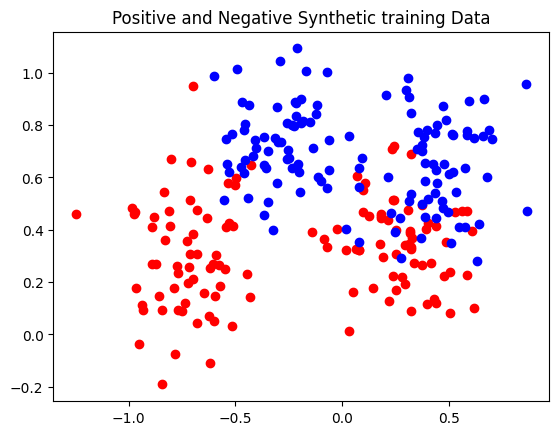

In [27]:
#Read in our training and testing files
training_set = np.loadtxt("synth.tr",skiprows=1)
testing_set = np.loadtxt("synth.te", skiprows=1)

#Instantiate arrays to graph our training data
training_set_x_c1, training_set_y_c1 = [], []
training_set_x_c2, training_set_y_c2 = [], []
testing_set_x_c1, testing_set_y_c1 = [], []
testing_set_x_c2, testing_set_y_c2 = [], []

#sort our training data by class.
for item in training_set:
    if(item[2] == 0):
        training_set_x_c1.append(item[0])
        training_set_y_c1.append(item[1])
    else:
        training_set_x_c2.append(item[0])
        training_set_y_c2.append(item[1])

#Plot our data
plt.scatter(training_set_x_c1, training_set_y_c1,c='red')
plt.scatter(training_set_x_c2, training_set_y_c2, c='blue')
plt.title('Positive and Negative Synthetic training Data')

**Minimum Euclidean Distance Classifier**

Total Accuracy:  70.39999999999999
Class 0 Accuracy:  54.800000000000004
Class 1 Accuracy:  86.0
preds:  [0 0 0 ... 1 1 1]
preds len:  3427380
1485   1485


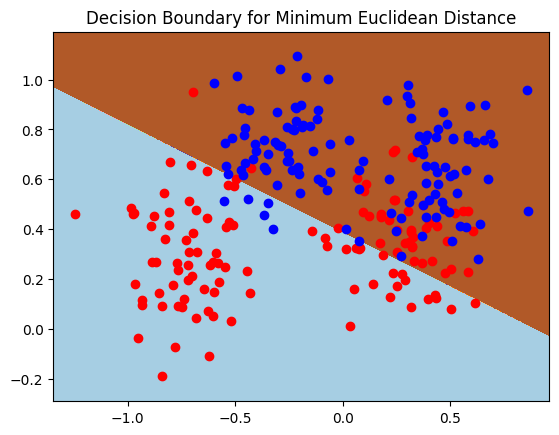

In [47]:
class MED_Classifier():
    
    def _innit_(self):
        self.X_train = [] #x_train data
        self.y_train = [] #y_train data
        self.classes = [] #list of classes
        self.means = [] #list to hold class means used in predict.
        self.sigmas = None #list to hold each sigma value

    #We will fit our training_set to the classifier here.  This is what "trains" our model to be able to predict things.
    def fit(self,training_set):
        #The first thing we need to do is sepperate our training set into lists based on class.
        #We can do this by concatting every class in our training set then calling np.unique to get all unique values.
        self.classes = np.unique(training_set[:,2])
        class_means = [] #list to hold all class means
        self.class_0_data, self.class_1_data = [], [] #list to hold all points of class 0 and 1 data
        class_0_data_nc, class_1_data_nc = [], [] #list to hold all points of class 0 and 1 data without the class variable
        class_0_centered, class_1_centered = [], [] #list to hold centered data after subtracting mean
        c0_cov = [] #list to hold the covariance matrix for class 0
        c1_cov = [] #list to hold the covariance matrix for class 1
        sigmas = [] #list to gold the sigma values for each class

        for item in training_set:
            if(item[2] == 0):
                self.class_0_data.append(item)
            else:
                self.class_1_data.append(item)

        #Here I am stripping the class column off each array
        temp = []
        for subarray in self.class_0_data:
            temp.append(subarray[:2])
        class_0_data_nc = temp
        temp = []
        for subarray in self.class_1_data:
            temp.append(subarray[:2])
        class_1_data_nc = temp

        #Calculate the mean of each class's data cluster
        class_means.append(np.mean(class_0_data_nc, axis=0))
        class_means.append(np.mean(class_1_data_nc, axis=0))
        
        self.means = class_means

        #center our data by subtracting the mean from each point
        class_0_centered = class_0_data_nc - class_means[0]
        class_1_centered = class_1_data_nc - class_means[1]

        #calculate the covariance of each class
        c0_cov = np.cov(class_0_centered,rowvar=False)
        c1_cov = np.cov(class_1_centered, rowvar=False)

        ##I have no idea if this is correct.  This is worth checking with a ta or Dr. Qi.
        #Find the variance / sigma of both class 1 and class 2
        variance = 0
        for i in range(0, 2):
            variance += c0_cov[i][i]
        sigmas.append(variance/2)

        variance = 0
        for i in range(0, 2):
            variance += c1_cov[i][i]
        sigmas.append(variance/2)
        self.sigmas = sigmas

    #We will make predictions about our testing_set here.  This is what will "classify the data for us".
    def predict(self,testing_set):
        #for each testing point we want to find the minimum euclidean distance to the mean of the data.
        self.actual_class = [] #variable to hold the actual class of the testing set
        self.probs = [] #variable to hold probabilities for each class, probs[0] = class 0 & probs[1] = class 1
        self.testing_set_class_0 = testing_set[testing_set[:, -1] == 0][:, :3]  # Data points in class 0
        self.testing_set_class_1 = testing_set[testing_set[:, -1] == 1][:, :3]  # Data points in class 1
        self.prior = 0.5 #prior knowledge constant

        for i in range(0, len(testing_set)):
            self.actual_class.append(testing_set[i][2])
            #c0 = (np.dot(np.transpose(self.means[0]) / self.sigmas[0], testing_set[i, :2]) - np.dot(np.transpose(self.means[0]), self.means[0]) / (2 * self.sigmas[0]) + np.log(self.prior))
            #c1 = (np.dot(np.transpose(self.means[1]) / self.sigmas[1], testing_set[i, :2]) - np.dot(np.transpose(self.means[1]), self.means[1]) / (2 * self.sigmas[1]) + np.log(self.prior))


            # c0 = (-1) * np.abs(testing_set[i, :2] - self.means[0]) / (2 * self.sigmas[0]) + np.log(self.prior)
            # c1 = (-1) * np.abs(testing_set[i, :2] - self.means[1]) / (2 * self.sigmas[1]) + np.log(self.prior)
            
            c0 = (-1) * np.dot(np.transpose(testing_set[i, :2] - self.means[0]),  (testing_set[i, :2] - self.means[0])) / 2 * self.sigmas[0] + np.log(self.prior)
            c1 = (-1) * np.dot(np.transpose(testing_set[i, :2] - self.means[1]),  (testing_set[i, :2] - self.means[1])) / 2 * self.sigmas[1] + np.log(self.prior)

            self.probs.append((c0,c1))

    #We will evaluate our model here    
    def evaluate(self):
        #loop through each probability and determine whether class 0 or class 1 is higher.
        #compare the chosen probability to the actual probability inside self.actual_class.
        #if correct add +1 to accuracy counter.
        #divide correct scores by total scores to find percent classified correctly.

        chosen_class = None
        accuracy_counter = 0
        class_0_counter = 0
        class_1_counter = 0
        for i in range(0, len(self.probs)):
            if(self.probs[i][0] > self.probs[i][1]):
                chosen_class = 0
            else:
                chosen_class = 1
                
            if(chosen_class == self.actual_class[i]):
                accuracy_counter += 1
                if(chosen_class == 0):
                    class_0_counter += 1
                else:
                    class_1_counter += 1
        
        print('Total Accuracy: ', 100 * (accuracy_counter / (len(self.probs))))
        print('Class 0 Accuracy: ', 100 * (class_0_counter / 500))
        print('Class 1 Accuracy: ', 100 * (class_1_counter / 500))
        
        return(100 * (accuracy_counter / (len(self.probs))), 100 * (class_0_counter / 500), 100 * (class_1_counter / 500))


    def make_preds(self, grid):

        self.pred_list = []
        self.pred_probs = []
        for i in range(0, len(grid)):
            c0 = (np.dot(np.transpose(self.means[0]) / self.sigmas[0], grid[i, :2]) - np.dot(np.transpose(self.means[0]), self.means[0]) / (2 * self.sigmas[0]) + np.log(self.prior))
            c1 = (np.dot(np.transpose(self.means[1]) / self.sigmas[1], grid[i, :2]) - np.dot(np.transpose(self.means[1]), self.means[1]) / (2 * self.sigmas[1]) + np.log(self.prior))

            self.pred_probs.append((c0,c1))

        for i in range(0, len(self.pred_probs)):
            if(self.pred_probs[i][0] > self.pred_probs[i][1]):
                self.pred_list.append(0)
            else:
                self.pred_list.append(1)
        
        return self.pred_list
    
    def vis(self):
        #define bounds of the doman
        min1, max1 = training_set[:, 0].min() - .1, training_set[:, 0].max() + .1
        min2, max2 = training_set[:, 1].min() - .1, training_set[:, 1].max() + .1
        x1grid = np.arange(min1, max1, 0.001)
        x2grid = np.arange(min2, max2, 0.001)
        xx, yy = np.meshgrid(x1grid, x2grid)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        grid = np.hstack((r1, r2))
        preds = self.make_preds(grid)
        preds = np.array(preds)
        print('preds: ', preds)
        print('preds len: ', len(preds))
        print(len(xx), ' ', len(yy))
        zz = preds.reshape(xx.shape)

        plt.contourf(xx, yy, zz, cmap='Paired')
        plt.scatter(training_set_x_c1, training_set_y_c1,c='red')
        plt.scatter(training_set_x_c2, training_set_y_c2, c='blue')
        plt.title('Decision Boundary for Minimum Euclidean Distance')


med_classifier = MED_Classifier()
med_classifier.fit(training_set=training_set)
med_classifier.predict(testing_set=testing_set)
med_results = med_classifier.evaluate()
med_classifier.vis()

**Minimum Mahalanobis Distance Classifier**

In [29]:
class MMD_Classifier():
    
    def _innit_(self):
        self.X_train = [] #x_train data
        self.y_train = [] #y_train data
        self.classes = [] #list of classes
        self.means = [] #list to hold class means used in predict.
        self.sigmas = None #list to hold each sigma value

    #We will fit our training_set to the classifier here.  This is what "trains" our model to be able to predict things.
    def fit(self,training_set):
        #The first thing we need to do is sepperate our training set into lists based on class.
        #We can do this by concatting every class in our training set then calling np.unique to get all unique values.
        self.classes = np.unique(training_set[:,2])
        class_means = [] #list to hold all class means
        class_0_data, class_1_data = [], [] #list to hold all points of class 0 and 1 data
        class_0_data_nc, class_1_data_nc = [], [] #list to hold all points of class 0 and 1 data without the class variable
        class_0_centered, class_1_centered = [], [] #list to hold centered data after subtracting mean
        c0_cov = [] #list to hold the covariance matrix for class 0
        c1_cov = [] #list to hold the covariance matrix for class 1
        sigmas = [] #list to gold the sigma values for each class

        for item in training_set:
            if(item[2] == 0):
                class_0_data.append(item)
            else:
                class_1_data.append(item)

        #Here I am stripping the class column off each array
        temp = []
        for subarray in class_0_data:
            temp.append(subarray[:2])
        class_0_data_nc = temp
        temp = []
        for subarray in class_1_data:
            temp.append(subarray[:2])
        class_1_data_nc = temp

        #Calculate the mean of each class's data cluster
        class_means.append(np.mean(class_0_data_nc, axis=0))
        class_means.append(np.mean(class_1_data_nc, axis=0))
        
        self.means = class_means

        #center our data by subtracting the mean from each point
        class_0_centered = class_0_data_nc - class_means[0]
        class_1_centered = class_1_data_nc - class_means[1]

        #calculate the covariance of each class
        self.c0_cov = np.cov(class_0_centered,rowvar=False)
        self.c1_cov = np.cov(class_1_centered, rowvar=False)

        ##I have no idea if this is correct.  This is worth checking with a ta or Dr. Qi.
        #Find the variance / sigma of both class 1 and class 2
        variance = 0
        for i in range(0, 2):
            variance += self.c0_cov[i][i]
        sigmas.append(variance/2)

        variance = 0
        for i in range(0, 2):
            variance += self.c1_cov[i][i]
        sigmas.append(variance/2)
        self.sigmas = sigmas

    #We will make predictions about our testing_set here.  This is what will "classify the data for us".
    def predict(self,testing_set):
        #for each testing point we want to find the minimum euclidean distance to the mean of the data.
        self.actual_class = [] #variable to hold the actual class of the testing set
        self.probs = [] #variable to hold probabilities for each class, probs[0] = class 0 & probs[1] = class 1
        self.testing_set_class_0 = testing_set[testing_set[:, -1] == 0][:, :3]  # Data points in class 0
        self.testing_set_class_1 = testing_set[testing_set[:, -1] == 1][:, :3]  # Data points in class 1
        self.prior = 0.5 #prior knowledge constant

        #print('blorbus: ', self.testing_set_class_0[0][:2])
        for i in range(0, len(testing_set)):
            self.actual_class.append(testing_set[i][2])
            
            c0 = np.linalg.multi_dot([np.transpose(self.means[0]), np.transpose(np.linalg.inv(self.c0_cov)), testing_set[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[0]), np.linalg.inv(self.c0_cov), self.means[0]]) + np.log(self.prior)
            c1 = np.linalg.multi_dot([np.transpose(self.means[1]), np.transpose(np.linalg.inv(self.c1_cov)), testing_set[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[1]), np.linalg.inv(self.c1_cov), self.means[1]]) + np.log(self.prior)

            self.probs.append((c0,c1))

    #We will evaluate our model here    
    def evaluate(self):
        #loop through each probability and determine whether class 0 or class 1 is higher.
        #compare the chosen probability to the actual probability inside self.actual_class.
        #if correct add +1 to accuracy counter.
        #divide correct scores by total scores to find percent classified correctly.

        chosen_class = None
        accuracy_counter = 0
        class_0_counter = 0
        class_1_counter = 0
        for i in range(0, len(self.probs)):
            if(self.probs[i][0] > self.probs[i][1]):
                chosen_class = 0
            else:
                chosen_class = 1
                
            if(chosen_class == self.actual_class[i]):
                accuracy_counter += 1
                if(chosen_class == 0):
                    class_0_counter += 1
                else:
                    class_1_counter += 1
                    
        print('Accuracy: ', 100 * (accuracy_counter / (len(self.probs))))
        print('Class 0 Accuracy: ', 100 * (class_0_counter / 500))
        print('Class 1 Accuracy: ', 100 * (class_1_counter / 500))

        return(100 * (accuracy_counter / (len(self.probs))), 100 * (class_0_counter / 500), 100 * (class_1_counter / 500))

        
    def make_preds(self, grid):

        self.pred_list = []
        self.pred_probs = []
        for i in range(0, len(grid)):
            c0 = np.linalg.multi_dot([np.transpose(self.means[0]), np.transpose(np.linalg.inv(self.c0_cov)), grid[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[0]), np.linalg.inv(self.c0_cov), self.means[0]]) + np.log(self.prior)
            c1 = np.linalg.multi_dot([np.transpose(self.means[1]), np.transpose(np.linalg.inv(self.c1_cov)), grid[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[1]), np.linalg.inv(self.c1_cov), self.means[1]]) + np.log(self.prior)

            self.pred_probs.append((c0,c1))

        for i in range(0, len(self.pred_probs)):
            if(self.pred_probs[i][0] > self.pred_probs[i][1]):
                self.pred_list.append(0)
            else:
                self.pred_list.append(1)
        
        return self.pred_list
    
    def vis(self):
        #define bounds of the doman
        min1, max1 = training_set[:, 0].min() - .1, training_set[:, 0].max() + .1
        min2, max2 = training_set[:, 1].min() - .1, training_set[:, 1].max() + .1
        x1grid = np.arange(min1, max1, 0.001)
        x2grid = np.arange(min2, max2, 0.001)
        xx, yy = np.meshgrid(x1grid, x2grid)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        grid = np.hstack((r1, r2))
        preds = self.make_preds(grid)
        #print('preds: ', preds)
        preds = np.array(preds)
        print('preds: ', preds)
        zz = preds.reshape(xx.shape)

        plt.contourf(xx, yy, zz, cmap='Paired')
        plt.scatter(training_set_x_c1, training_set_y_c1,c='red')
        plt.scatter(training_set_x_c2, training_set_y_c2, c='blue')
        plt.title('Decision Boundary for Minimum Mahalanobis Distance')


mmd_classifier = MMD_Classifier()
mmd_classifier.fit(training_set=training_set)
mmd_classifier.predict(testing_set=testing_set)
mmd_results = mmd_classifier.evaluate()
# mmd_classifier.vis()

Accuracy:  87.1
Class 0 Accuracy:  84.0
Class 1 Accuracy:  90.2


**Maximum Posterior Probability Classifier**


Accuracy:  89.8
Class 0 Accuracy:  90.8
Class 1 Accuracy:  88.8
preds:  [0 0 0 ... 1 1 1]


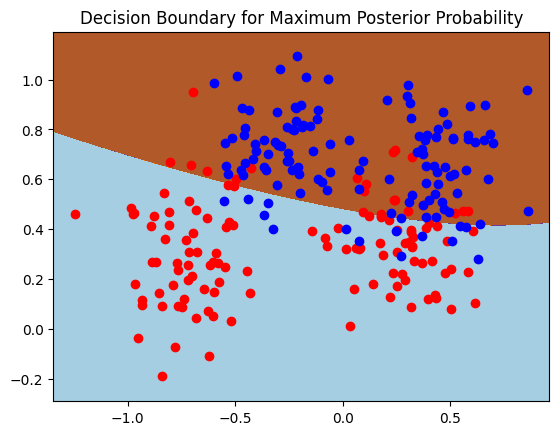

In [30]:
class MPP_Classifier():
    
    def _innit_(self):
        self.X_train = [] #x_train data
        self.y_train = [] #y_train data
        self.classes = [] #list of classes
        self.means = [] #list to hold class means used in predict.
        self.sigmas = None #list to hold each sigma value

    #We will fit our training_set to the classifier here.  This is what "trains" our model to be able to predict things.
    def fit(self,training_set):
        #The first thing we need to do is sepperate our training set into lists based on class.
        #We can do this by concatting every class in our training set then calling np.unique to get all unique values.
        self.classes = np.unique(training_set[:,2])
        class_means = [] #list to hold all class means
        class_0_data, class_1_data = [], [] #list to hold all points of class 0 and 1 data
        class_0_data_nc, class_1_data_nc = [], [] #list to hold all points of class 0 and 1 data without the class variable
        class_0_centered, class_1_centered = [], [] #list to hold centered data after subtracting mean
        c0_cov = [] #list to hold the covariance matrix for class 0
        c1_cov = [] #list to hold the covariance matrix for class 1
        sigmas = [] #list to gold the sigma values for each class

        for item in training_set:
            if(item[2] == 0):
                class_0_data.append(item)
            else:
                class_1_data.append(item)

        #Here I am stripping the class column off each array
        temp = []
        for subarray in class_0_data:
            temp.append(subarray[:2])
        class_0_data_nc = temp
        temp = []
        for subarray in class_1_data:
            temp.append(subarray[:2])
        class_1_data_nc = temp

        #Calculate the mean of each class's data cluster
        class_means.append(np.mean(class_0_data_nc, axis=0))
        class_means.append(np.mean(class_1_data_nc, axis=0))
        
        self.means = class_means

        #center our data by subtracting the mean from each point
        class_0_centered = class_0_data_nc - class_means[0]
        class_1_centered = class_1_data_nc - class_means[1]

        #calculate the covariance of each class
        self.c0_cov = np.cov(class_0_centered,rowvar=False)
        self.c1_cov = np.cov(class_1_centered, rowvar=False)

        ##I have no idea if this is correct.  This is worth checking with a ta or Dr. Qi.
        #Find the variance / sigma of both class 1 and class 2
        variance = 0
        for i in range(0, 2):
            variance += self.c0_cov[i][i]
        sigmas.append(variance/2)

        variance = 0
        for i in range(0, 2):
            variance += self.c1_cov[i][i]
        sigmas.append(variance/2)
        self.sigmas = sigmas

    #We will make predictions about our testing_set here.  This is what will "classify the data for us".
    def predict(self,testing_set):
        #for each testing point we want to find the minimum euclidean distance to the mean of the data.
        self.actual_class = [] #variable to hold the actual class of the testing set
        self.probs = [] #variable to hold probabilities for each class, probs[0] = class 0 & probs[1] = class 1
        self.testing_set_class_0 = testing_set[testing_set[:, -1] == 0][:, :3]  # Data points in class 0
        self.testing_set_class_1 = testing_set[testing_set[:, -1] == 1][:, :3]  # Data points in class 1
        self.prior = 0.5 #prior knowledge constant

        #print('blorbus: ', self.testing_set_class_0[0][:2])
        for i in range(0, len(testing_set)):
            self.actual_class.append(testing_set[i][2])
            
            c0 = (-0.5) * np.linalg.multi_dot([(np.transpose(testing_set[i, :2])), np.linalg.inv(self.c0_cov), testing_set[i, :2]]) + np.linalg.multi_dot([np.transpose(self.means[0]), np.linalg.inv(self.c0_cov), testing_set[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[0]), np.linalg.inv(self.c0_cov), self.means[0]]) + (-0.5) * np.log(np.linalg.det(self.c0_cov))
            c1 = (-0.5) * np.linalg.multi_dot([(np.transpose(testing_set[i, :2])), np.linalg.inv(self.c1_cov), testing_set[i, :2]]) + np.linalg.multi_dot([np.transpose(self.means[1]), np.linalg.inv(self.c1_cov), testing_set[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[1]), np.linalg.inv(self.c1_cov), self.means[1]]) + (-0.5) * np.log(np.linalg.det(self.c1_cov))

            self.probs.append((c0,c1))

    #We will evaluate our model here    
    def evaluate(self):
        #loop through each probability and determine whether class 0 or class 1 is higher.
        #compare the chosen probability to the actual probability inside self.actual_class.
        #if correct add +1 to accuracy counter.
        #divide correct scores by total scores to find percent classified correctly.

        chosen_class = None
        accuracy_counter = 0
        class_0_counter = 0
        class_1_counter = 0
        for i in range(0, len(self.probs)):
            if(self.probs[i][0] > self.probs[i][1]):
                chosen_class = 0
            else:
                chosen_class = 1
                
            if(chosen_class == self.actual_class[i]):
                accuracy_counter += 1
                if(chosen_class == 0):
                    class_0_counter += 1
                else:
                    class_1_counter += 1
                    
        print('Accuracy: ', 100 * (accuracy_counter / (len(self.probs))))
        print('Class 0 Accuracy: ', 100 * (class_0_counter / 500))
        print('Class 1 Accuracy: ', 100 * (class_1_counter / 500))

        return(100 * (accuracy_counter / (len(self.probs))), 100 * (class_0_counter / 500), 100 * (class_1_counter / 500))

        

    def make_preds(self, grid):

        self.pred_list = []
        self.pred_probs = []
        for i in range(0, len(grid)):

            c0 = (-0.5) * np.linalg.multi_dot([(np.transpose(grid[i, :2])), np.linalg.inv(self.c0_cov), grid[i, :2]]) + np.linalg.multi_dot([np.transpose(self.means[0]), np.linalg.inv(self.c0_cov), grid[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[0]), np.linalg.inv(self.c0_cov), self.means[0]]) + (-0.5) * np.log(np.linalg.det(self.c0_cov))
            c1 = (-0.5) * np.linalg.multi_dot([(np.transpose(grid[i, :2])), np.linalg.inv(self.c1_cov), grid[i, :2]]) + np.linalg.multi_dot([np.transpose(self.means[1]), np.linalg.inv(self.c1_cov), grid[i, :2]]) + (-0.5) * np.linalg.multi_dot([np.transpose(self.means[1]), np.linalg.inv(self.c1_cov), self.means[1]]) + (-0.5) * np.log(np.linalg.det(self.c1_cov))

            self.pred_probs.append((c0,c1))

        for i in range(0, len(self.pred_probs)):
            if(self.pred_probs[i][0] > self.pred_probs[i][1]):
                self.pred_list.append(0)
            else:
                self.pred_list.append(1)
        
        return self.pred_list
    
    def vis(self):
        #define bounds of the domain
        min1, max1 = training_set[:, 0].min() - .1, training_set[:, 0].max() + .1
        min2, max2 = training_set[:, 1].min() - .1, training_set[:, 1].max() + .1
        x1grid = np.arange(min1, max1, 0.001)
        x2grid = np.arange(min2, max2, 0.001)
        xx, yy = np.meshgrid(x1grid, x2grid)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        grid = np.hstack((r1, r2))
        preds = self.make_preds(grid)
        
        preds = np.array(preds)
        print('preds: ', preds)
        zz = preds.reshape(xx.shape)

        plt.contourf(xx, yy, zz, cmap='Paired')
        plt.scatter(training_set_x_c1, training_set_y_c1,c='red')
        plt.scatter(training_set_x_c2, training_set_y_c2, c='blue')
        plt.title('Decision Boundary for Maximum Posterior Probability')

       
mpp_classifier = MPP_Classifier()
mpp_classifier.fit(training_set=training_set)
mpp_classifier.predict(testing_set=testing_set)
mpp_results = mpp_classifier.evaluate()
mpp_classifier.vis()

**K-Nearest Neighbor Implementation**

In [31]:
k_vals = []
accuracies = []

In [68]:
class KNN_classifier():
    def __init__(self, k_nearest):
        self.k_nearest = k_nearest
        self.sorted_lists = []

    def predict(self, training_set, testing_point):
        distances = []
        for j in range(0, len(training_set)):
            distance = np.linalg.norm(training_set[j][:2] - testing_point[:2])
            distances.append((distance, training_set[j][2]))     
        
        distances = np.array(distances)
        sorted = distances[np.argsort(distances[:,0])]
        self.sorted_lists.append(sorted)

    def fit(self, training_set, testing_set):
        for i in range(0, len(testing_set)):
            self.predict(training_set, testing_set[i])

    def evaluate(self, testing_set):
        accuracy_count = 0
        class_0_cor = 0
        class_1_cor = 0
        self.preds = []

        for i in range(0, len(testing_set)):
            actual_class = testing_set[i][2]
            predicted_class = None
            class_0_count, class_1_count = 0, 0
            for j in range(0, self.k_nearest):
                if self.sorted_lists[i][j][1] == 0:
                    class_0_count += 1
                else:
                    class_1_count += 1
            
            if class_0_count > class_1_count:
                predicted_class = 0
                self.preds.append(0)
            elif class_0_count < class_1_count:
                predicted_class = 1
                self.preds.append(1)
            else:
                predicted_class = np.random.normal(0,1,1)
            
            if(actual_class == predicted_class):
                accuracy_count += 1
                if(actual_class == 0):
                    class_0_cor += 1
                else:
                    class_1_cor += 1
        
        class_0_percent = 100 * class_0_cor / 500
        class_1_percent = 100 * class_1_cor / 500
        acc_percent = 100 * accuracy_count / len(testing_set)
        return (acc_percent, class_0_percent, class_1_percent)
    
    def make_preds(self, training_set, grid):
        self.sorted_lists = []
        distances = []
        for i in range(0, len(grid)):
            for j in range(0, len(training_set)):
                distance = np.linalg.norm(training_set[j][:2] - grid[i][:2])
                distances.append((distance, training_set[j][2]))     

            distances = np.array(distances)
            sorted = distances[np.argsort(distances[:,0])]
            self.sorted_lists.append(sorted)
            distances = []
            if(i % 10 == 0):
                print(i)

        print('after sorting lists')
        ########################## after sorting ##########################
        self.preds = []

        for i in range(0, len(grid)):
        
            predicted_class = None
            class_0_count, class_1_count = 0, 0
            for j in range(0, self.k_nearest):
                if self.sorted_lists[i][j][1] == 0:
                    class_0_count += 1
                else:
                    class_1_count += 1
            
            if class_0_count > class_1_count:
                predicted_class = 0
                self.preds.append(0)
            elif class_0_count < class_1_count:
                predicted_class = 1
                self.preds.append(1)
            else:
                predicted_class = np.random.normal(0,1,1)
                self.preds.append(predicted_class)  

            if(i % 10 == 0):
                print(i)    

        return self.preds      
 
    def vis(self):
        print('in vis')
        min1, max1 = training_set[:, 0].min() - .1, training_set[:, 0].max() + .1
        min2, max2 = training_set[:, 1].min() - .1, training_set[:, 1].max() + .1
        x1grid = np.arange(min1, max1, 0.01)
        x2grid = np.arange(min2, max2, 0.01)
        xx, yy = np.meshgrid(x1grid, x2grid)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

        # g_classes = []
        # for _ in range(3427380):
        #     random_number = np.random.randint(0,1)
        #     g_classes.append(random_number)

        # g_classes = np.array(g_classes)
        # g_classes = g_classes.reshape(len(g_classes), 1)

        grid = np.hstack((r1, r2))

        print('grid len: ', len(grid))
        preds = self.make_preds(training_set, grid)
 
        preds = np.array(preds)
        print('preds: ', preds)
        print('preds len: ', len(preds))
        zz = preds.reshape(xx.shape)

        plt.contourf(xx, yy, zz, cmap='Paired')
        plt.scatter(training_set_x_c1, training_set_y_c1,c='red')
        plt.scatter(training_set_x_c2, training_set_y_c2, c='blue')
        plt.title('Decision Boundary for K-Nearest Neighbor')
# val_accs = []

# for i in range(1, 251, 2):
#     #print(i)
#     knn_classifier = KNN_classifier(k_nearest=i)
#     knn_classifier.fit(training_set, testing_set)

#     k_vals.append(i)
#     acc = knn_classifier.evaluate(testing_set)
#     accuracies.append(acc[0])

#     val_accs.append((acc[0], i))

# val_accs = np.array(val_accs)
# sorted_val_accs = val_accs[np.argsort(val_accs[:,0])]

#print(sorted_val_accs)



**Best KNN K-Value: 57**

in vis
grid len:  34419
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
21

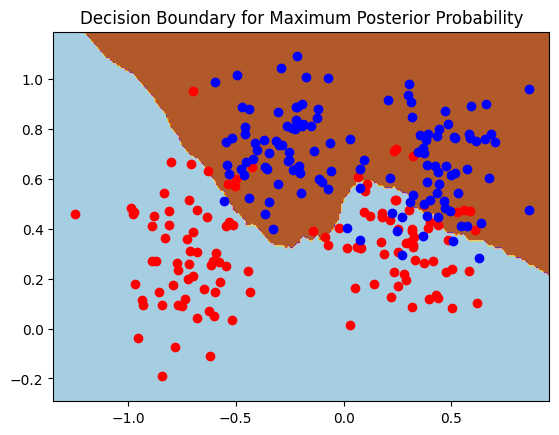

In [69]:
kc = KNN_classifier(k_nearest=57)
kc.fit(training_set, testing_set)
kc_results = kc.evaluate(testing_set)
kc.vis()
# print('total_accuracy: ', kc_results[0])
# print('class_0_acc: ', kc_results[1])
# print('class_1_acc: ', kc_results[2])

Text(0, 0.5, 'Accuracies')

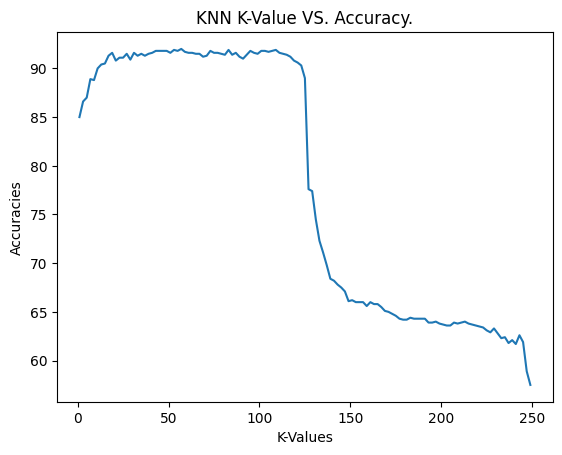

In [ ]:
plt.plot(k_vals, accuracies)
plt.title('KNN K-Value VS. Accuracy.')
plt.xlabel('K-Values')
plt.ylabel('Accuracies')

In [ ]:
#Create Table here#
print('knn_results: \n', kc_results)
print('med_results: \n', med_results)
print('mmd_results: \n', mmd_results)
print('mpp_results: \n', mpp_results)

names = ['Minimum Euclidean', 'Minimum Mahalanobis', 'Maximum Posterior', 'K-Nearest', 'Runtime']
total_accuracies = [str(round(float(med_results[0]), 1)) + '%', str(float(mmd_results[0])) + '%', str(float(mpp_results[0])) + '%', str(float(kc_results[0])) + '%']
c0_accuracies =    [str(round(float(med_results[1]), 1)) + '%', str(float(mmd_results[1])) + '%', str(float(mpp_results[1])) + '%', str(float(kc_results[1])) + '%']
c1_accuracies =    [str(float(med_results[2])) + '%', str(float(mmd_results[2])) + '%', str(float(mpp_results[2])) + '%', str(float(kc_results[2])) + '%']
run_times = ['0.2s', '0.3s', '0.3s', '0.9s']
df = pd.DataFrame(list(zip(names, total_accuracies, c0_accuracies, c1_accuracies, run_times)),
                   columns = ['Classifier Name', 'Total Accuracy', 'Class 0 Accuracy', 'Class 1 Accuracy', 'Run Time'])

df

knn_results: 
 (92.0, 92.0, 92.0)
med_results: 
 (70.39999999999999, 54.800000000000004, 86.0)
mmd_results: 
 (87.1, 84.0, 90.2)
mpp_results: 
 (89.8, 90.8, 88.8)


,Classifier Name,Total Accuracy,Class 0 Accuracy,Class 1 Accuracy,Run Time
0,Minimum Euclidean,70.4%,54.8%,86.0%,0.2s
1,Minimum Mahalanobis,87.1%,84.0%,90.2%,0.3s
2,Maximum Posterior,89.8%,90.8%,88.8%,0.3s
3,K-Nearest,92.0%,92.0%,92.0%,0.9s


In [ ]:
#KNN Visualization

